In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = r"..\data\clean\merged_clean_owen2.csv"

df = pd.read_csv(data)

indie_df = df[(df['publisherClass'] == 'Indie')]
full_df = df.copy()

In [5]:
melt_by_genre = pd.melt(indie_df, id_vars=['name', 'revenue', 'copies_sold'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Massively Multiplayer', 'Action',
                                     'Free To Play', 'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

melt_by_genre = melt_by_genre[melt_by_genre['is_in_genre'] == True]

genre_summary = melt_by_genre.groupby('genre').agg(
    count=('name', 'count'),
    total_revenue=('revenue', 'sum'),
    avg_revenue_per_game= ('revenue', 'mean'),
    total_copies_sold = ('copies_sold', 'sum'),
    min_revenue=('revenue', 'min'),                  
    Q1_revenue=('revenue', lambda x: x.quantile(0.25)),  
    median_revenue=('revenue', 'median'),            
    Q3_revenue=('revenue', lambda x: x.quantile(0.75)),
    max_revenue=('revenue', 'max')     
).reset_index()

genre_summary['avg_rev_per_copy_sold'] = genre_summary['total_revenue'] / genre_summary['total_copies_sold']

genre_summary = genre_summary.sort_values(by=['total_revenue'], ascending=[False])

genre_summary

,genre,count,total_revenue,avg_revenue_per_game,total_copies_sold,min_revenue,Q1_revenue,median_revenue,Q3_revenue,max_revenue,avg_rev_per_copy_sold
1,Adventure,593,4.530540e+08,7.640034e+05,67845605,20922.000000,42253.00,88551.0,3.299600e+05,3.403074e+07,6.677721
0,Action,469,4.058550e+08,8.653625e+05,31176208,20922.000000,40218.00,97404.0,3.662110e+05,3.403074e+07,13.018100
6,Simulation,489,3.730953e+08,7.629762e+05,61419925,20723.000000,48929.00,111599.0,3.668700e+05,3.126669e+07,6.074500
4,RPG,483,3.494843e+08,7.235699e+05,29801050,21067.000000,45289.50,99105.0,3.562145e+05,3.126669e+07,11.727247
3,Massively Multiplayer,47,1.084814e+08,2.308115e+06,6329836,21162.000000,40041.50,175228.0,1.059547e+06,3.403074e+07,17.138107
2,Free To Play,58,8.839722e+07,1.524090e+06,46154947,21880.594799,49217.25,247688.0,1.443233e+06,1.568936e+07,1.915227
5,Racing,26,1.890430e+07,7.270885e+05,1017951,21606.000000,34457.25,105769.5,2.310392e+05,9.517954e+06,18.570934
7,Sports,35,1.629912e+07,4.656892e+05,1752060,20723.000000,44344.50,78067.0,8.317585e+05,2.449168e+06,9.302833


In [20]:
full_melt_by_genre = pd.melt(full_df, id_vars=['name', 'publisherClass', 'revenue', 'copies_sold'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Action',
                                     'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

full_melt_by_genre = full_melt_by_genre[full_melt_by_genre['is_in_genre'] == True]

full_genre_summary = full_melt_by_genre.groupby(['publisherClass','genre']).agg(
    count=('name', 'count'),
    total_revenue=('revenue', 'sum'),
    avg_revenue_per_game= ('revenue', 'mean'),
    total_copies_sold = ('copies_sold', 'sum'),
    min_revenue=('revenue', 'min'),                  
    Q1_revenue=('revenue', lambda x: x.quantile(0.25)),  
    median_revenue=('revenue', 'median'),            
    Q3_revenue=('revenue', lambda x: x.quantile(0.75)),
    max_revenue=('revenue', 'max')     
).reset_index()

full_genre_summary['avg_rev_per_copy_sold'] = full_genre_summary['total_revenue'] / full_genre_summary['total_copies_sold']

full_genre_summary = full_genre_summary.sort_values(by=['genre','avg_revenue_per_game'], ascending=[True,False])

full_genre_summary

,publisherClass,genre,count,total_revenue,avg_revenue_per_game,total_copies_sold,min_revenue,Q1_revenue,median_revenue,Q3_revenue,max_revenue,avg_rev_per_copy_sold
6,AAA,Action,29,1.533627e+09,5.288369e+07,32784370,65173.0,667814.00,933938.0,4.747832e+06,837793356.0,46.779213
0,AA,Action,70,1.303000e+09,1.861429e+07,60333836,32016.0,330510.25,1079704.0,4.972556e+06,392328553.0,21.596511
13,Indie,Action,469,4.058550e+08,8.653625e+05,31176208,20922.0,40218.00,97404.0,3.662110e+05,34030740.0,13.018100
7,AAA,Adventure,16,9.023208e+08,5.639505e+07,16954076,54185.0,291554.75,705627.5,2.031779e+06,837793356.0,53.221464
1,AA,Adventure,76,1.285348e+09,1.691248e+07,58774182,20674.0,138905.75,748410.0,3.232552e+06,392328553.0,21.869271
14,Indie,Adventure,593,4.530540e+08,7.640034e+05,67845605,20922.0,42253.00,88551.0,3.299600e+05,34030740.0,6.677721
8,AAA,RPG,9,9.750582e+08,1.083398e+08,17852813,25991.0,178950.00,920024.0,2.295894e+07,837793356.0,54.616503
2,AA,RPG,42,9.759838e+08,2.323771e+07,43585475,22568.0,529679.50,1958128.0,8.920276e+06,392328553.0,22.392410
15,Indie,RPG,483,3.494843e+08,7.235699e+05,29801050,21067.0,45289.50,99105.0,3.562145e+05,31266686.0,11.727247
12,Hobbyist,RPG,1,4.787100e+04,4.787100e+04,3129,47871.0,47871.00,47871.0,4.787100e+04,47871.0,15.299137


In [22]:
indie_by_genre = pd.melt(indie_df, id_vars=['name', 'revenue', 'copies_sold'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Action',
                                     'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

indie_by_genre = indie_by_genre[indie_by_genre['is_in_genre'] == True]

indie_by_genre = indie_by_genre[['name', 'revenue', 'copies_sold', 'genre']]

full_by_genre = pd.melt(full_df, id_vars=['name', 'revenue', 'copies_sold'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Action',
                                     'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

full_by_genre = full_by_genre[full_by_genre['is_in_genre'] == True]

full_by_genre = full_by_genre[['name', 'revenue', 'copies_sold', 'genre']]

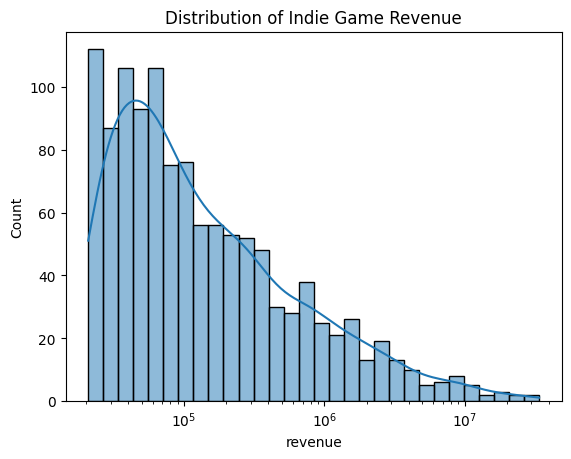

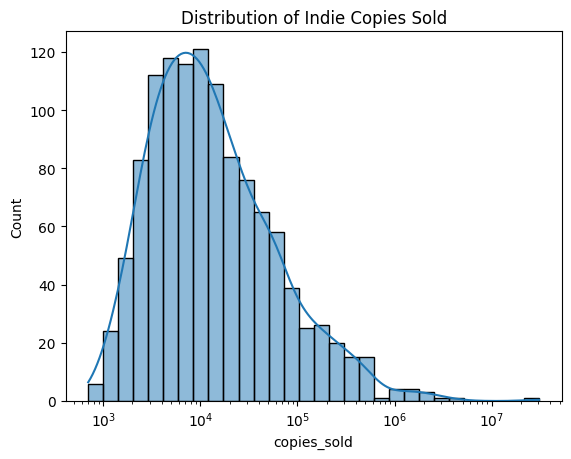

In [28]:
df = indie_by_genre[['name', 'revenue', 'copies_sold']].copy()
df = df.drop_duplicates(subset='name')

# Histogram for Revenue and Copies Sold (log scale for better visualization)
sns.histplot(df['revenue'], kde=True, bins=30, log_scale=True)
plt.title('Distribution of Indie Game Revenue')
plt.savefig(r'..\figures\indie_revenue_distribution.png', format="png", dpi=300, bbox_inches='tight', transparent=False)
plt.show()

sns.histplot(df['copies_sold'], kde=True, bins=30, log_scale=True)
plt.title('Distribution of Indie Copies Sold')
plt.savefig(r'..\figures\indie_copies_sold_distribution.png', format="png", dpi=300, bbox_inches='tight', transparent=False)
plt.show()

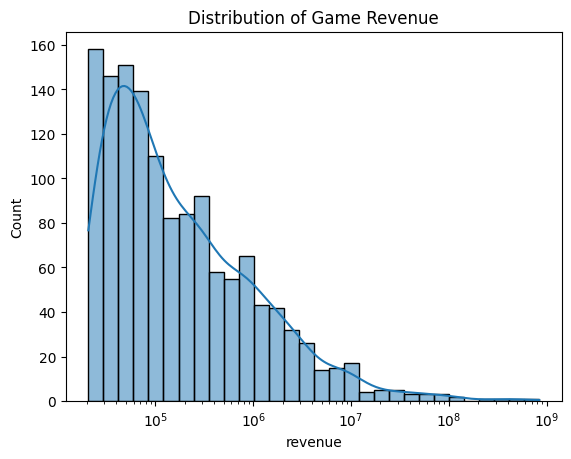

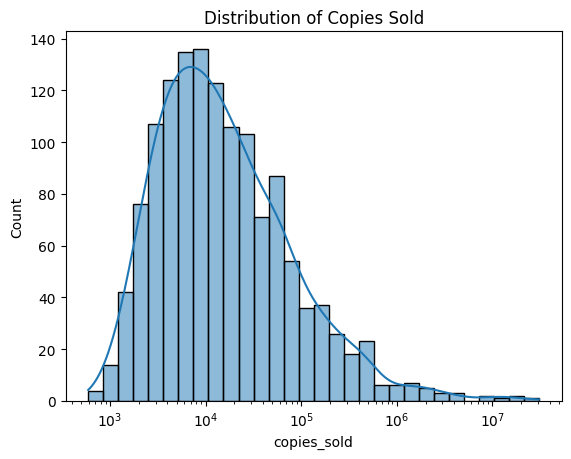

In [27]:
df = full_by_genre[['name', 'revenue', 'copies_sold']].copy()
df = df.drop_duplicates(subset='name')

# Histogram for Revenue and Copies Sold (log scale for better visualization)
sns.histplot(df['revenue'], kde=True, bins=30, log_scale=True)
plt.title('Distribution of Game Revenue')
plt.savefig(r'..\figures\game_revenue_distribution.png', format="png", dpi=300, bbox_inches='tight', transparent=False)
plt.show()

sns.histplot(df['copies_sold'], kde=True, bins=30, log_scale=True)
plt.title('Distribution of Copies Sold')
plt.savefig(r'..\figures\game_copies_sold_distribution.png', format="png", dpi=300, bbox_inches='tight', transparent=False)
plt.show()

C:\Users\olgeo\AppData\Local\Temp\ipykernel_28120\1571793146.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['total_revenue'], palette='Set2')


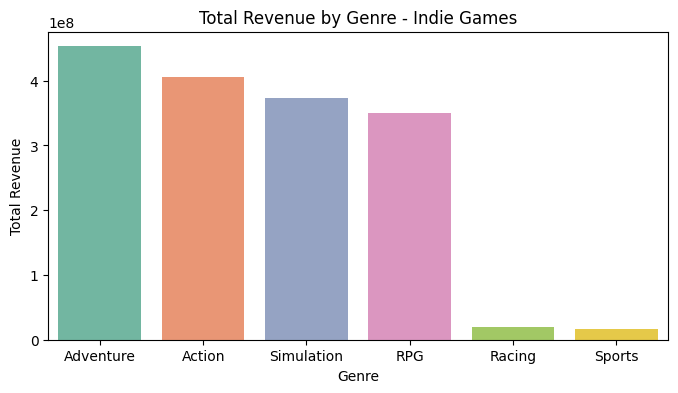

C:\Users\olgeo\AppData\Local\Temp\ipykernel_28120\1571793146.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['avg_revenue'], palette='Set2')


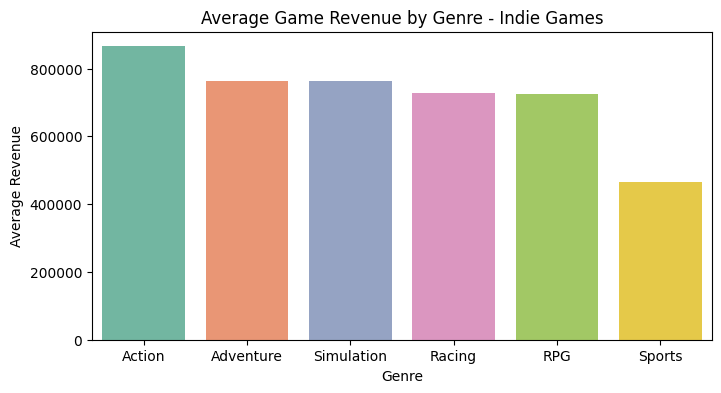

C:\Users\olgeo\AppData\Local\Temp\ipykernel_28120\1571793146.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['med_revenue'], palette='Set2')


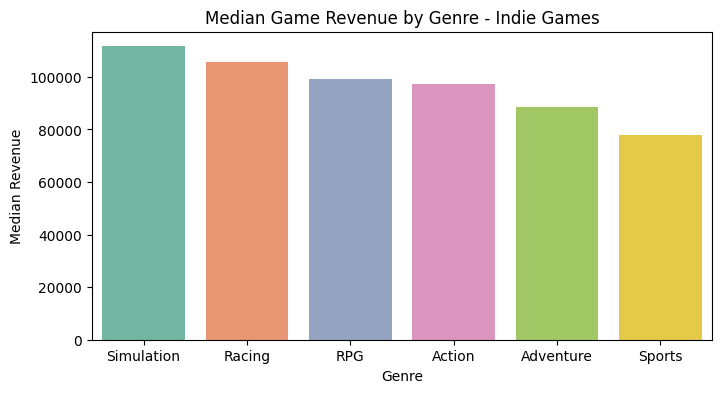

In [30]:
df = indie_by_genre[['name', 'genre', 'revenue', 'copies_sold']].copy()

genre_performance = df.groupby('genre').agg(
    total_revenue=('revenue', 'sum'),
    total_copies_sold=('copies_sold', 'sum'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='total_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['total_revenue'], palette='Set2')
plt.title('Total Revenue by Genre - Indie Games')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\indie_total_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


genre_performance = df.groupby('genre').agg(
    avg_revenue=('revenue', 'mean'),
    avg_copies_sold=('copies_sold', 'mean'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='avg_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['avg_revenue'], palette='Set2')
plt.title('Average Game Revenue by Genre - Indie Games')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\indie_avg_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

genre_performance = df.groupby('genre').agg(
    med_revenue=('revenue', 'median'),
    med_copies_sold=('copies_sold', 'median'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='med_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['med_revenue'], palette='Set2')
plt.title('Median Game Revenue by Genre - Indie Games')
plt.xlabel('Genre')
plt.ylabel('Median Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\indie_med_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


C:\Users\olgeo\AppData\Local\Temp\ipykernel_28120\603405194.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['total_revenue'], palette='Set2')


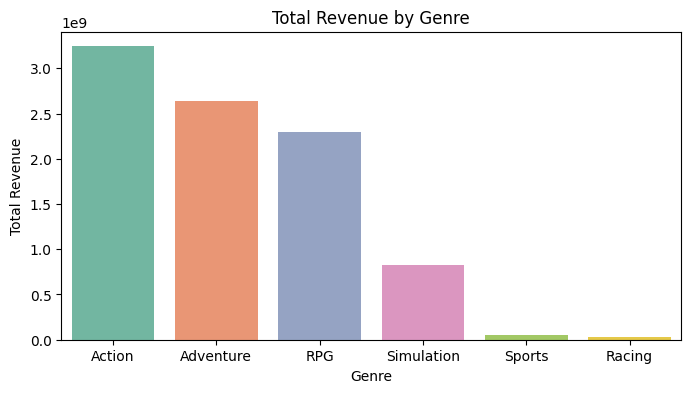

C:\Users\olgeo\AppData\Local\Temp\ipykernel_28120\603405194.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['avg_revenue'], palette='Set2')


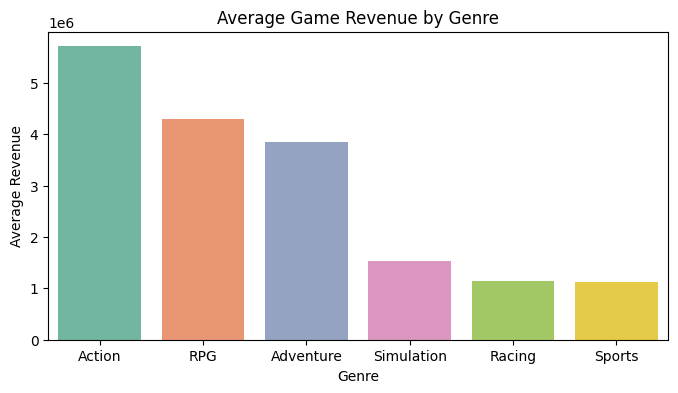

C:\Users\olgeo\AppData\Local\Temp\ipykernel_28120\603405194.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['med_revenue'], palette='Set2')


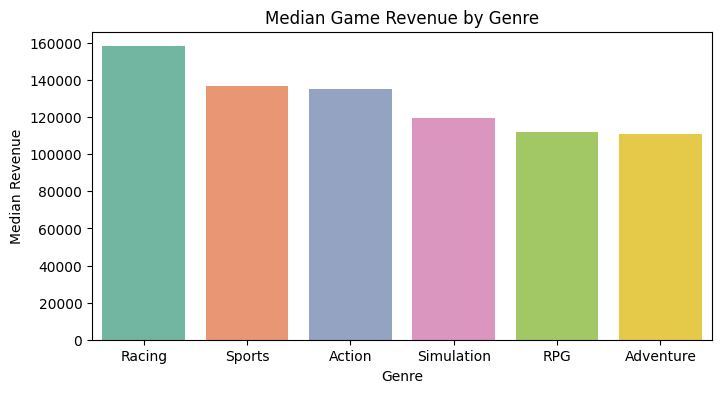

In [31]:
df = full_by_genre[['name', 'genre', 'revenue', 'copies_sold']].copy()

genre_performance = df.groupby('genre').agg(
    total_revenue=('revenue', 'sum'),
    total_copies_sold=('copies_sold', 'sum'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='total_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['total_revenue'], palette='Set2')
plt.title('Total Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\total_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


genre_performance = df.groupby('genre').agg(
    avg_revenue=('revenue', 'mean'),
    avg_copies_sold=('copies_sold', 'mean'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='avg_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['avg_revenue'], palette='Set2')
plt.title('Average Game Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\avg_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

genre_performance = df.groupby('genre').agg(
    med_revenue=('revenue', 'median'),
    med_copies_sold=('copies_sold', 'median'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='med_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['med_revenue'], palette='Set2')
plt.title('Median Game Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\med_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [32]:
full_melt_by_genre = pd.melt(full_df, id_vars=['name', 'publisherClass', 'revenue', 'copies_sold'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Action',
                                     'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

full_melt_by_genre = full_melt_by_genre[full_melt_by_genre['is_in_genre'] == True]

full_genre_summary = full_melt_by_genre.groupby(['publisherClass','genre']).agg(
    count=('name', 'count'),
    total_revenue=('revenue', 'sum'),
    avg_revenue_per_game= ('revenue', 'mean'),
    total_copies_sold = ('copies_sold', 'sum'),
    min_revenue=('revenue', 'min'),                  
    Q1_revenue=('revenue', lambda x: x.quantile(0.25)),  
    median_revenue=('revenue', 'median'),            
    Q3_revenue=('revenue', lambda x: x.quantile(0.75)),
    max_revenue=('revenue', 'max')     
).reset_index()

full_genre_summary['avg_rev_per_copy_sold'] = full_genre_summary['total_revenue'] / full_genre_summary['total_copies_sold']

full_genre_summary = full_genre_summary.sort_values(by=['genre','avg_revenue_per_game'], ascending=[True,False])

full_genre_summary

Index(['steamId', 'name', 'release_date', 'copies_sold', 'price_USD',
       'price_local', 'revenue', 'avgPlaytime', 'publisherClass', 'publishers',
       'developers', 'required_age', 'is_free', 'description',
       'about the game', 'languages', 'language_count', 'genres', 'categories',
       'estimated owners', 'peak ccu', 'metacritic score', 'review_score',
       'positive', 'negative', 'recommendations', 'average playtime forever',
       'average playtime two weeks', 'median playtime forever',
       'median playtime two weeks', 'Early Access', 'Strategy', 'Casual',
       'Simulation', 'RPG', 'Racing', 'Massively Multiplayer', 'Indie',
       'Action', 'Free To Play', 'Adventure', 'Sports', 'Single-player',
       'Multi-player', 'Steam Achievements', 'In-App Purchases',
       'Partial Controller Support', 'Steam Cloud', 'Family Sharing',
       'Full controller support', 'Steam Trading Cards'],
      dtype='object')